In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import pandas as pd
import util.utilities as util
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Dataset

In [3]:
# Import papers spreadsheet to dataset
df_sms_extraction = pd.read_excel('../../dataset/Extraction_form.xlsx')
df_sms_extraction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 34 columns):
Paper Id                                                                                            47 non-null int64
Citation                                                                                            47 non-null object
Google Scholar                                                                                      47 non-null object
Authors                                                                                             47 non-null object
Title                                                                                               47 non-null object
Publication Year                                                                                    47 non-null int64
Abstract                                                                                            47 non-null object
Venue Type                                                        

In [4]:
# Petersen et al. 2008:
# Research type – This facet is used to distinguish between different types of studies (adapted from Wieringa et al. 2005).
# - Evaluation research – A study that reports the subject implemented in practice, i.e. evaluation in a real environment, in general by means of the case study method.
# - Validation research – A study that reports a subject that was not implemented in practice yet, although it was validated in laboratory environment, in general by means of experiment.
# - Solution proposal – A study that reports a subject that was neither implemented in practice nor validated although it is supported by a small example (illustration) or a good line of argumentation.
# - Philosophical paper – A study that reports a new subject that has no type of evaluation, validation or illustration.

In [5]:
df_sms_extraction[['Paper Id', 'Citation', 'Title','Techniques, approach and methods (parsed)','Kind of research 2', 'Limitations', 'Future Works']]
#df_sms_extraction[df_sms_extraction["Kind of reasearch"].isna()][['Paper Id', 'Citation', 'Title', 'Kind of reasearch', 'Kind of research 2']]

,Paper Id,Citation,Title,"Techniques, approach and methods (parsed)",Kind of research 2,Limitations,Future Works
0,1,Perez et al. 2019,A Proposed Model-driven Approach to Manage Arc...,"general:""Model-Driven Architecture Approach, N...","Case study, case study in industry, expert opi...",NaN,Future work will include convolutional neural ...
1,2,Martini et al 2017,A semi-automated framework for the identificat...,"general:""specialist technical evaluation, modu...","Case study in industry, expert opinion",To estimate the effort to fix the ATD is neces...,NaN
2,3,Roveda et al. 2018,Towards an Architectural Debt Index,"general:""architecture smells, modularity""\n# \...","survey, observation",The data validation should be performed in a r...,The authors would also like to detect differen...
3,4,Snipes et al. 2018,A Case Study of the Effects of Architecture De...,"general:""architectural root, source code, revi...",case study in industry,Only one project in short time of 9 months.,"In future work, we plan to study the process o..."
4,5,Nayebi et al. 2019,A Longitudinal Study of Identifying and Paying...,"general:""maintainability, architecture flaws, ...",case study in industry,The calculus of cost of ATDI depends on the pa...,No
5,7,Feng et al. 2019,Active Hotspot: An Issue-Oriented Model to Mon...,"general:""source code, revision history, hotspo...",Empirical study on Apache Projects,First the accuracy of our study depends on th...,"The amount of files choose, as the threshodld,..."
6,9,Li et al. 2014,An Empirical Investigation of Modularity Metr...,"general:""modularity, average number of modifie...",Empirical investigation in OSS projects,"In this case study, only C# OSS projects were ...",Based on the results and findings of this work...
7,10,Martini et al. 2016,An Empirically Developed Method to Aid Decisio...,"general:""source code, software architecture do...","Case study, case study in industry, industrial...",There are some limitations in this study. Most...,Future work aims at increasing the precision o...
8,13,Xiao et al. 2016,Identifying and Quantifying Architectural Debt,"general:""Design Rules Spaces, Design Structure...",Empirical study on Apache Projects,"First, since we have only examined 7 projects ...",We plan to evaluate the eficiectiveness of our...
9,14,Verdecchia 2018,Identifying Architectural Technical Debt in An...,"general:""Architecture Description Language, AD...",Toy examples,The study is a short paper with only two pages.,"As future work, we plan to fully automate the..."


## 1.1 List of Analysed Papers

In [6]:
for item in zip(list(df_sms_extraction['Citation']), list(df_sms_extraction['Title'])):
    citation = item[0]
    title = ' '.join(item[1].split())
    print('({}, {})'.format(citation, title))

(Perez et al. 2019, A Proposed Model-driven Approach to Manage Architectural Technical Debt Life Cycle)
(Martini et al 2017, A semi-automated framework for the identification and estimation of Architectural Technical Debt: A comparative case-study on the modularization of a software component)
(Roveda et al. 2018, Towards an Architectural Debt Index)
(Snipes et al. 2018, A Case Study of the Effects of Architecture Debt on Software Evolution Effort)
(Nayebi et al. 2019, A Longitudinal Study of Identifying and Paying Down architecture debt)
(Feng et al. 2019, Active Hotspot: An Issue-Oriented Model to Monitor Software Evolution and Degradation)
(Li et al. 2014, An Empirical Investigation of Modularity Metrics for Indicating architectural technical debt)
(Martini et al. 2016, An Empirically Developed Method to Aid Decisions on Architectural Technical Debt Refactoring: AnaConDebt)
(Xiao et al. 2016, Identifying and Quantifying Architectural Debt)
(Verdecchia 2018, Identifying Architectural

## 1.2 List of Authors

In [7]:
list_of_authors, list_of_uniques_authors = util.list_of_items(df_data=df_sms_extraction, column_name='Authors')


List of all 161 Authors : ['', '', 'A Tahmid', 'A. Nandakumar', 'Alan MacCormack', 'Alexander Chatzigeorgiou', 'Alexander Chatzigeorgiou', 'Alexander von Zitzewitz', 'Alexandra Szynkarski', 'Alexandra Szynkarski', 'Alfred Zimmermann', 'Alfred Zimmermann', 'Andrea Biaggi', 'Andriy Shapochka', 'Andrzej Zalewski', 'Antonela Tommasel', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Apostolos Ampatzoglou', 'Apostolos Ampatzoglou', 'Apostolos Ampatzoglou', 'Areti Ampatzoglou', 'Bill Curtis', 'Bill Curtis', 'Boris Perez', 'Chris Carlson', 'Claudia Raibulet', 'Clemente Izurieta', 'Damian A. Tamburri', 'Daniel J. Sturtevant', 'Dario Correal', 'Darius Sas', 'David Rice', 'Di Cui', 'Diomidis Spinellis', 'E Shihab', 'Elvira-Maria Arvanitou', 'Erik Sikander', 'Erik Sikander', 'Francesca Arcelli Fontan

In [8]:
list_of_most_common_authors = Counter(list_of_authors).most_common()
print(list_of_most_common_authors)

[('Antonio Martini', 13), ('Jan Bosch', 7), ('Rick Kazman', 7), ('Yuanfang Cai', 7), ('Francesca Arcelli Fontana', 6), ('Paris Avgeriou', 5), ('Qiong Feng', 5), ('Ran Mo', 4), ('Riccardo Roveda', 4), ('Apostolos Ampatzoglou', 3), ('Lu Xiao', 3), ('Marco Zanoni', 3), ('', 2), ('Alexander Chatzigeorgiou', 2), ('Alexandra Szynkarski', 2), ('Alfred Zimmermann', 2), ('Bill Curtis', 2), ('Erik Sikander', 2), ('Ilaria Pigazzini', 2), ('Jay Sappidi', 2), ('Jonas Fritzsch', 2), ('Justus Bogner', 2), ('Michel Chaudron', 2), ('Niel Madlani', 2), ('Peng Liang', 2), ('Stefan Wagner', 2), ('Terese Besker', 2), ('Zengyang Li', 2), ('A Tahmid', 1), ('A. Nandakumar', 1), ('Alan MacCormack', 1), ('Alexander von Zitzewitz', 1), ('Andrea Biaggi', 1), ('Andriy Shapochka', 1), ('Andrzej Zalewski', 1), ('Antonela Tommasel', 1), ('Areti Ampatzoglou', 1), ('Boris Perez', 1), ('Chris Carlson', 1), ('Claudia Raibulet', 1), ('Clemente Izurieta', 1), ('Damian A. Tamburri', 1), ('Daniel J. Sturtevant', 1), ('Dario 

In [9]:
#Repeated researchers: 
#Jonas Fritzsch Jonas Fritzsch Jonas Fritzsch Jouni Markkula Jouni Markkula
#Stefan Wagner Stefan Wagner Stefan Wagner
df_authors = pd.read_csv('../../dataset/authors.csv')
df_authors.sort_values(by=['country']).head()

,author,local,country
0,A Tahmid,?,?
23,David Rice,?,?
24,Di Cui,?,?
62,Peng Liang,?,?
26,E Shihab,?,?


In [10]:
df_authors['country'].value_counts()

?             40
USA            9
Nederland      6
Suécia         6
Itália         6
Finlândia      5
Grécia         4
Alemanha       3
Canadá         3
China          2
Luxemburgo     1
Argentina      1
Chile          1
Holanda        1
Austria        1
Name: country, dtype: int64

## 1.3 List of Key words

In [11]:
list_of_key_words, list_of_uniques_key_words = util.list_of_items(df_data=df_sms_extraction, column_name='Key words')

List of all 204 Key words : ['Agile software development', 'Android', 'Architectural Debt', 'Architectural Technical Debt', 'Architectural deb', 'Architectural debt', 'Architectural smells', 'Architectural technical debt', 'Architectural technical debt', 'Architectural technical debt', 'Architectural technical debt management', 'Architecture Design Decisions', 'Architecture Recovery', 'Architecture Technical Debt', 'Architecture assessment', 'Architecture debt', 'Architecture erosion', 'Automotive engineering', 'Business', 'Cloud computing security', 'Complex systems', 'Compliance Checking', 'Computer architecture', 'Computer architecture', 'Computer architecture', 'Context', 'Cost-benefit analysis', 'Criticality', 'Design', 'Design debt', 'Design refactoring', 'Development Cost', 'Economics', 'Empirical Study', 'Estimation', 'Estimation', 'Feature Prioritization', 'Grounded Theory', 'History', 'IEEE Newspaper', 'Information Need', 'Longitudinal study', 'Maintainability', 'Management',

In [12]:
# Normalize the key words to lower
list_temp = []
for each in list_of_key_words:
    list_temp.append(each.lower())
list_of_key_words = list_temp

# Sort keys words by frequency
list_of_most_common_key_words = Counter(list_of_key_words).most_common()
print(list_of_most_common_key_words)

[('technical debt', 18), ('software architecture', 15), ('architectural technical debt', 7), ('agile software development', 3), ('architectural debt', 3), ('architectural smells', 3), ('computer architecture', 3), ('qualitative model', 3), ('refactoring', 3), ('software management', 3), ('software quality', 3), ('survey', 3), ('architecture debt', 2), ('estimation', 2), ('maintainability', 2), ('measurement', 2), ('modularization', 2), ('software evolution', 2), ('software maintenance', 2), ('software life-cycle', 2), ('industry', 2), ('software metrics', 2), ('android', 1), ('architectural deb', 1), ('architectural technical debt management', 1), ('architecture design decisions', 1), ('architecture recovery', 1), ('architecture technical debt', 1), ('architecture assessment', 1), ('architecture erosion', 1), ('automotive engineering', 1), ('business', 1), ('cloud computing security', 1), ('complex systems', 1), ('compliance checking', 1), ('context', 1), ('cost-benefit analysis', 1), 

## 1.4 List of Venues

In [13]:
list_of_venues = []
for item in list(df_sms_extraction['Name of Venue']): 
    item = ' '.join(item.split())
    list_of_venues.append(item)
list_of_venues.sort()

list_of_most_common_venues = Counter(list_of_venues).most_common()
print(list_of_most_common_venues)

[('Euromicro Conference on Software Engineering and Advanced Applications', 6), ('International Conference on Technical Debt (TechDebt)', 6), ('International Workshop on Managing Technical Debt (MTD)', 4), ('International Conference on Software Engineering', 3), ('European Conference on Software Architecture', 2), ('International Conference on Software Maintenance and Evolution (ICSME)', 2), ('Asia Pacific Software Engineering Conference', 1), ('Conference on Software Achitecture', 1), ('Conference on Software Architecture and European Conference on Software Architecture', 1), ('EE Transactions on Software Engineering', 1), ('IEEE Software', 1), ('Information and Software Technology Journal', 1), ('International Conference on Automated Software Engineering (ASE)', 1), ('International Conference on Mobile Software Engineering and Systems', 1), ('International Conference on Software Analysis, Evolution and Reengineering', 1), ('International Conference on Software Architecture Companion 

## 1.5 Related works and important works

In [14]:
list_of_related_work_sorted = util.clean_related_work(df_sms_extraction, 'Extra2 (Related work)')
list_of_related_work_sorted.pop(0)
print(list_of_related_work_sorted)

['A Balancing Act: What Software Practitioners Have to Say About Technical Debt', 'A Case Study in Locating the Architectural Roots of Technical Debt', 'A Case Study in Locating the Architectural Roots of Technical Debt', 'A Case Study in Locating the Architectural Roots of Technical Debt', 'A Case Study in Locating the Architectural Roots of Technical Debt', 'A Case Study on Effectively Identifying Technical Debt', 'A case study in locating the architectural roots of technical debt', 'A case study in locating the architectural roots of technical debt', 'A case study in locating the architectural roots of technical debt ', 'A case study on effectively identifying technical debt', 'A cost-benefit framework for making architectural decisions in a business context', 'A cost-benefit framework for making architectural decisions in a business context', 'A domain analysis to specify design defects and generate detection algorithms', 'A formal approach to technical debt decision making', 'A lo

In [15]:
list_of_important_work_sorted = util.clean_related_work(df_sms_extraction, 'Extra 3 (Important work)')
print(list_of_important_work_sorted)

['A Case Study in Locating the Architectural Roots of Technical Debt', 'A Case Study in Locating the Architectural Roots of Technical Debt', 'A Design Science Research Methodology for Information Systems Research', 'A Method for Assessing Class Change Proneness', 'A Portfolio Approach to Technical Debt Management', 'A Systematic Review of Software Maintainability Prediction and Metrics', 'A case study in locating the architectural roots of technical debt', 'A case study in locating the architectural roots of technical debt', 'A network approach to define modularity of components in complex products ', 'A systematic mapping on technical debt and its management', 'A systematic mapping study on technical debt and its management', 'A systematic mapping study on technical debt and its management Journal of Systems and Software  vol 101 pp 193–220 2015', 'API change and fault proneness: a threat to the success of Android apps', 'Agile requirements prioritization in large-scale outsourced sys

## 1.7 Basic statistic

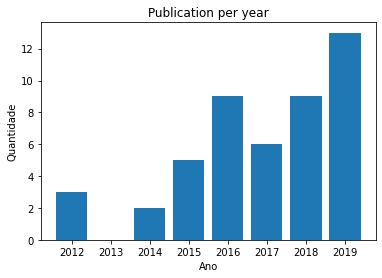

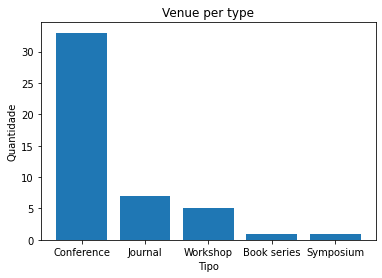

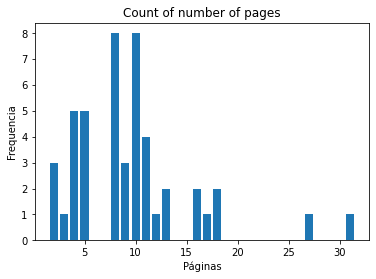

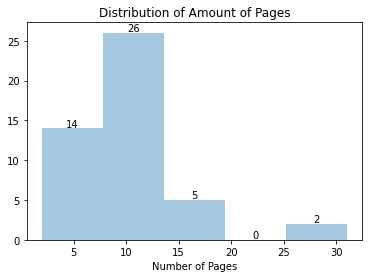

In [16]:
publication_per_year = dict(df_sms_extraction['Publication Year'].value_counts())
util.show_bar_plot_complete(publication_per_year, 'Publication per year', x_label='Ano', y_label='Quantidade')

venue_per_type = dict(df_sms_extraction['Venue Type'].value_counts())
util.show_bar_plot_complete(venue_per_type, 'Venue per type', x_label='Tipo', y_label='Quantidade')

number_of_page_grouped = dict(df_sms_extraction['Number of Pages'].value_counts())
util.show_bar_plot_complete(number_of_page_grouped, 'Count of number of pages', x_label='Páginas', y_label='Frequencia')

util.show_histogram(df_data=df_sms_extraction['Number of Pages'], title="Distribution of Amount of Pages", bins=5)

### Petersen et al [1] proposed that the mapping study could provide good overview of area, to identify research gaps, visualization of research trends, related work identification, and validation of gathred references.

In [17]:
# overview of area

# identify research gaps

# visualization of research trends

#### [1] Petersen et al. 2015. "Guidelines for conducting systematic mapping studies in software engineering: An update"